# Visualiserer data
Bruker seaborn til å lage grafer med verdiene våre. Vi har tidligere funnet gjennomsnittsverdi per måned. For å få en best mulig visualisering av hvordan trendene har endret seg over årene, har vi valgt å bare se på en måned hvert år. 

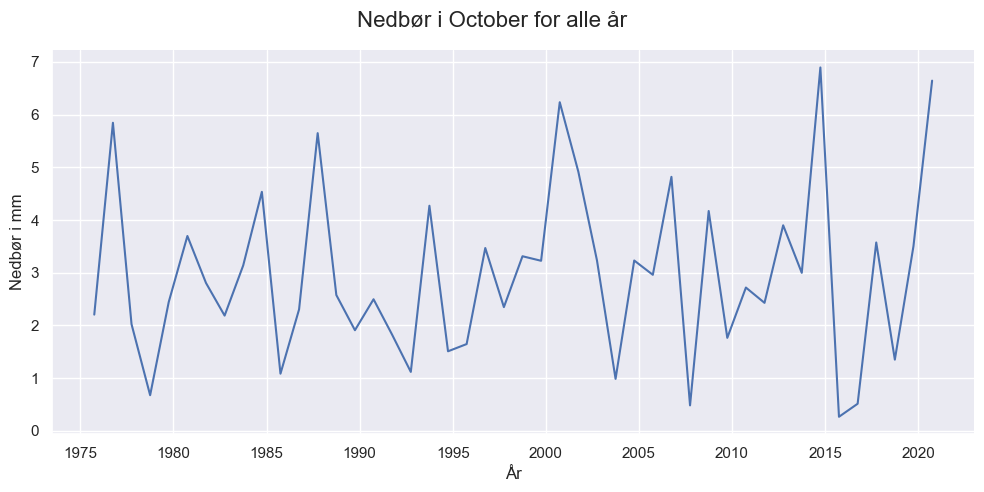

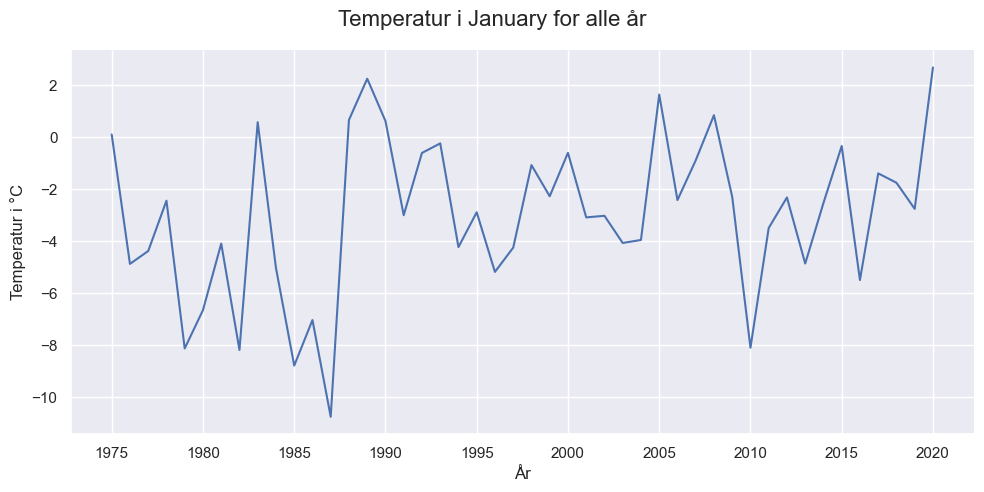

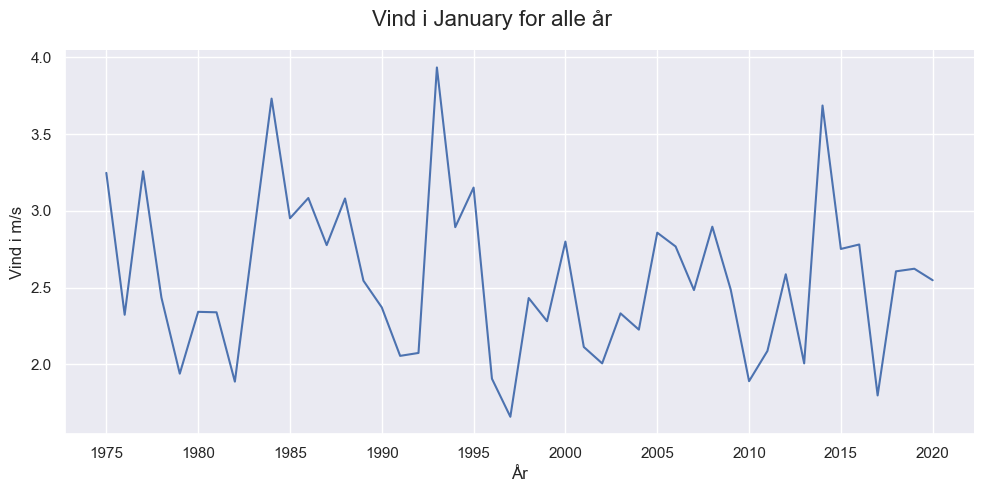

In [39]:
import sys
sys.path.append("../src")

from Visualisering import VisualiseringSeaborn

# Nedbør hver måned
nedbor_vis = VisualiseringSeaborn(
    "../data/Avarage/avarage_precipitation.csv",
    "Nedbør i mm",
    "Nedbør"
)
nedbor_vis.last_data()
nedbor_vis.filtrer_maaned(10)  # Velger hvilken måned man vil ha data for
nedbor_vis.plott()

# Temperatur hver måned
temp_vis = VisualiseringSeaborn(
    "../data/Avarage/avarage_temperatur.csv",
    "Temperatur i °C",
    "Temperatur"
)
temp_vis.last_data()
temp_vis.filtrer_maaned(1)  
temp_vis.plott()

#Vind hver måned
vind_vis = VisualiseringSeaborn(
    "../data/Avarage/avarage_wind.csv", 
    "Vind i m/s", 
    "Vind"
)
vind_vis.last_data()
vind_vis.filtrer_maaned(1)
vind_vis.plott()

# Interaktiv visualisering 
Her er det laget en intervaktiv visualisering slik at brukeren selv kan velge tidsintervallet de ønsker å sjekke værdata ved å dra på slideren over grafen.

In [ ]:
import pandas as pd

import sys
sys.path.append("../src")

from Visualisering import InteraktivVisualisering

# Les data
df_nedbor = pd.read_csv("../data/Avarage/avarage_precipitation.csv")
print(df_nedbor.head())

df_temp = pd.read_csv("../data/Avarage/avarage_temperatur.csv")
print(df_temp.head())

df_vind = pd.read_csv("../data/Avarage/avarage_wind.csv")
print(df_vind.head())


# Visualisere nedbør
interaktiv_visualisering_nedbor = InteraktivVisualisering(df_nedbor, "nedbor", "value")

# Visualisere temperatur
interaktiv_visualisering_temp = InteraktivVisualisering(df_temp, "temp", "value")

# Visualisere vind
interaktiv_visualisering_vind = InteraktivVisualisering(df_vind, "wind", "value")




   Unnamed: 0  year  month  value
0           0  1975      1  3.332
1           1  1975      2  0.614
2           2  1975      3  1.081
3           3  1975      4  1.062
4           4  1975      5  1.089
   Unnamed: 0  year  month   value
0           0  1975      1   0.110
1           1  1975      2  -3.664
2           2  1975      3   0.403
3           3  1975      4   4.172
4           4  1975      5  11.313
   Unnamed: 0  year  month  value
0           0  1975      1  3.248
1           1  1975      2  0.914
2           2  1975      3  2.297
3           3  1975      4  3.283
4           4  1975      5  3.571


interactive(children=(SelectionRangeSlider(description='Dato:', index=(0, 30), layout=Layout(width='80%'), opt…

interactive(children=(SelectionRangeSlider(description='Dato:', index=(0, 30), layout=Layout(width='80%'), opt…

interactive(children=(SelectionRangeSlider(description='Dato:', index=(0, 30), layout=Layout(width='80%'), opt…

# Scatterplot av værdata
Har her laget et scatterplot av data, kun fra måneden juli, som kan brukes til f.eks. regresjon. 

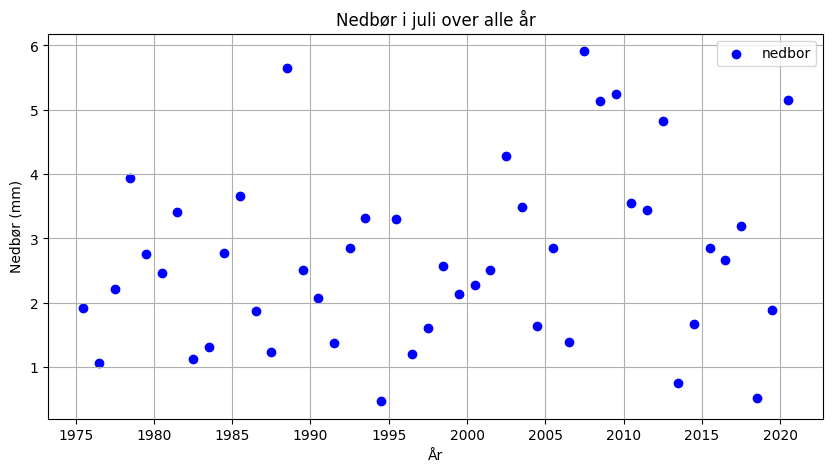

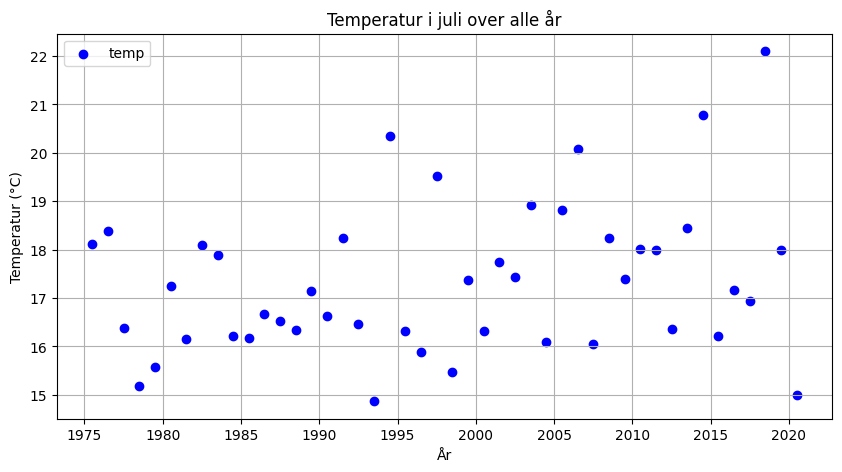

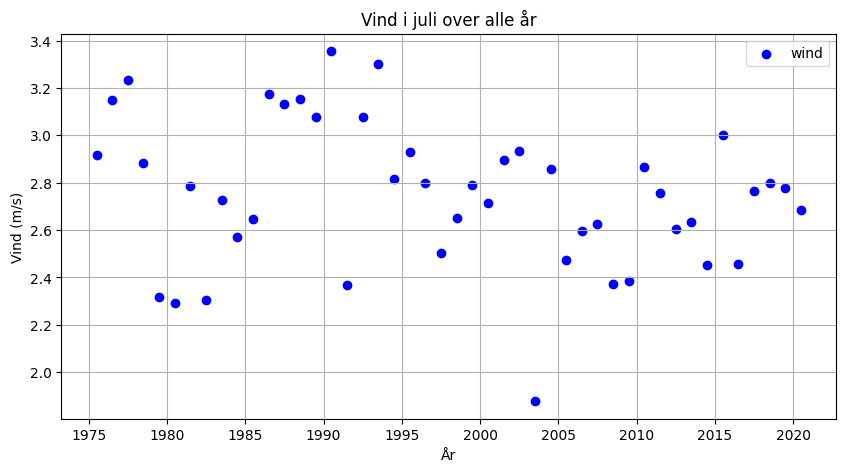

In [ ]:
import sys
sys.path.append("../src")

from Visualisering import ScatterPlot

nedbor_visualisering = ScatterPlot("../data/Avarage/avarage_precipitation.csv", datatype="nedbor", kolonne="value")
nedbor_visualisering.plot_data()

# Visualisere temperatur
temp_visualisering = ScatterPlot("../data/Avarage/avarage_temperatur.csv", datatype="temp", kolonne="value")
temp_visualisering.plot_data()

# Visualisere vind
vind_visualisering = ScatterPlot("../data/Avarage/avarage_wind.csv", datatype="wind", kolonne"value")
vind_visualisering.plot_data()

# Sammenlikning av luftkvalitet med annen værdata i 2017
Vi har fått hentet inn en csv med data for luftkvaliteten ved samme værstasjon i 2017. Luftkvalitet har mye sammenheng med annen værdata, og vi skal se på hvordan sammenhengen er mellom luftkvaliteten og temperatur, nedbør og vind ved hjelp av matplotlib. 

### Sammenheng mellom luftkvalitet og nedbør

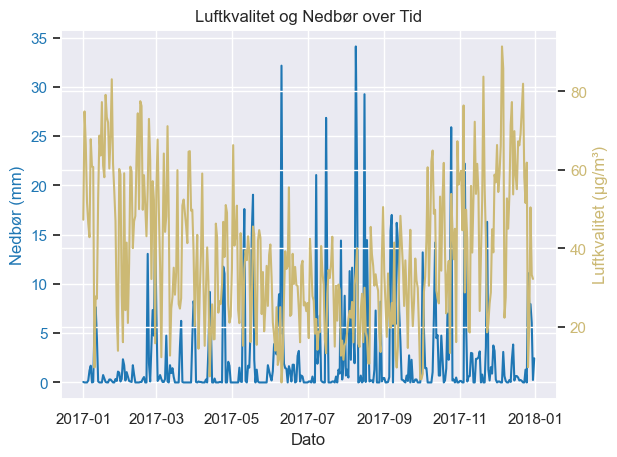

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Lese inn CSV-filen
df_luftkvalitet = pd.read_csv("../data/daglig_gjennomsnitt_2017.csv")
df_luftkvalitet["date"] = pd.to_datetime(df_luftkvalitet["Date"])

df = pd.read_csv("../data/gjsnitt_data.csv")
df["date"] = pd.to_datetime(df["date"])
df_nedbor_2017 = df[
    (df['date'].dt.year == 2017) &
    (df['elementId'].str.contains("precipitation_amount"))
]

fig, ax1 = plt.subplots()

# Primær y-akse (f.eks. temperatur)
ax1.plot(df_nedbor_2017["date"], df_nedbor_2017["value"], color="tab:blue", label="Nedbør (mm)")
ax1.set_ylabel("Nedbør (mm)", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Sekundær y-akse (f.eks. nedbør)
ax2 = ax1.twinx()
ax2.plot(df_luftkvalitet["date"], df_luftkvalitet["NO2"], color="y", label="Luftkvalitet (µg/m³)")
ax2.set_ylabel("Luftkvalitet (µg/m³)", color="y")
ax2.tick_params(axis='y', labelcolor="y")

# Felles x-akse
ax1.set_xlabel("Dato")

# Tittel
plt.title("Luftkvalitet og Nedbør over Tid")

plt.show()

### Sammenheng mellom luftkvalitet og temperatur

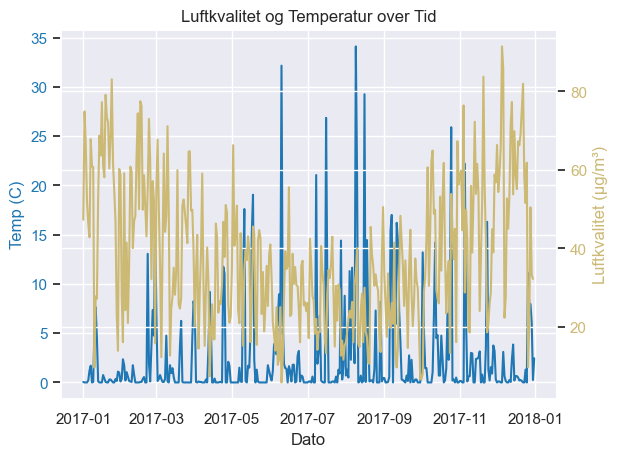

In [52]:
# 1. Lese inn CSV-filen
df_luftkvalitet = pd.read_csv("../data/daglig_gjennomsnitt_2017.csv")
df_luftkvalitet["date"] = pd.to_datetime(df_luftkvalitet["Date"])

df = pd.read_csv("../data/gjsnitt_data.csv")
df["date"] = pd.to_datetime(df["date"])
df_temp_2017 = df[
    (df['date'].dt.year == 2017) &
    (df['elementId'].str.contains("air_temperature"))
]

fig, ax1 = plt.subplots()

# Primær y-akse (f.eks. temperatur)
ax1.plot(df_temp_2017["date"], df_nedbor_2017["value"], color="tab:blue", label="Temp (C)")
ax1.set_ylabel("Temp (C)", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Sekundær y-akse (f.eks. nedbør)
ax2 = ax1.twinx()
ax2.plot(df_luftkvalitet["date"], df_luftkvalitet["NO2"], color="y", label="Luftkvalitet (µg/m³)")
ax2.set_ylabel("Luftkvalitet (µg/m³)", color="y")
ax2.tick_params(axis='y', labelcolor="y")

# Felles x-akse
ax1.set_xlabel("Dato")

# Tittel
plt.title("Luftkvalitet og Temperatur over Tid")

plt.show()

### Sammenheng mellom luftkvalitet og vind

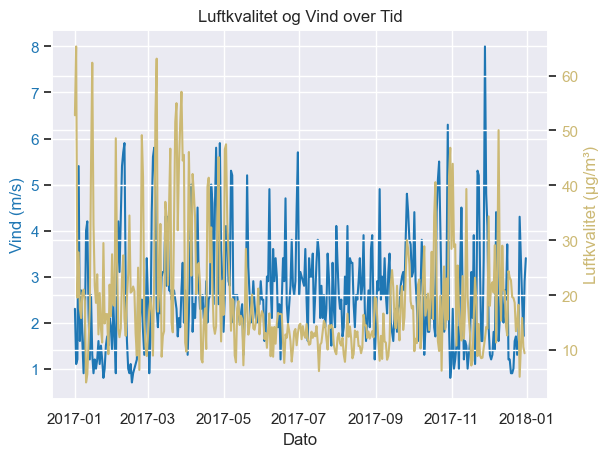

In [53]:
# 1. Lese inn CSV-filen
df_luftkvalitet = pd.read_csv("../data/daglig_gjennomsnitt_2017.csv")
df_luftkvalitet["date"] = pd.to_datetime(df_luftkvalitet["Date"])

df = pd.read_csv("../data/gjsnitt_data.csv")
df["date"] = pd.to_datetime(df["date"])
df_vind_2017 = df[
    (df['date'].dt.year == 2017) &
    (df['elementId'].str.contains("wind_speed"))
]

fig, ax1 = plt.subplots()

# Primær y-akse (f.eks. temperatur)
ax1.plot(df_vind_2017["date"], df_vind_2017["value"], color="tab:blue", label="Vind (m/s)")
ax1.set_ylabel("Vind (m/s)", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Sekundær y-akse (f.eks. nedbør)
ax2 = ax1.twinx()
ax2.plot(df_luftkvalitet["date"], df_luftkvalitet["PM10"], color="y", label="Luftkvalitet (µg/m³)")
ax2.set_ylabel("Luftkvalitet (µg/m³)", color="y")
ax2.tick_params(axis='y', labelcolor="y")

# Felles x-akse
ax1.set_xlabel("Dato")

# Tittel
plt.title("Luftkvalitet og Vind over Tid")

plt.show()